In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mne
from scipy import signal

In [2]:
sfreq = 125
freqs_names = ['delta', 'alpha', 'beta', 'gamma']
freq_ranges = [(0.5, 4), (8, 12), (12, 30), (30, 80)]
ch_names = ["ch1_LF5 - FpZ", "ch2_OTE_L-FpZ", "ch4_RF6-FpZ", "ch5_OTE_R-FpZ"]

### Part 1: Plotted in one figure for each subject: Please visualize the time-course of all power bands together. Where, X-axis is time(s), Y-axis is the energy level of different bands. 

In [3]:
def load_data(csv_path, max_n_samples=None):
    """Load data from csv file and transform to RawArray object.

    Args:
        csv_path (Path): file path.

    Returns:
        mne.io.RawArray: object of RawArray.
    """
    data = pd.read_csv(csv_path, usecols=[0, 1, 3, 4])
    if max_n_samples:
        data = data.values[:max_n_samples]
    data = data.T

    # Create MNE info object
    info = mne.create_info(ch_names, sfreq)
    
    # Create raw object
    raw = mne.io.RawArray(data, info)
    
    return raw

def calculate_psd(raw_array, fmin=0, fmax=50):
    """Energy level is usually represented by the Power Spectral Density (PSD) in the context of EEG analysis so I will using PSD as Y-axis
    
    Args:
        raw_array (mne.io.RawArray): mne.io.RawArray object.
        fmin, fmax=0, 50

    Returns:
        np.Array((n_channels, n_freqs)): n_channels is number of channels, n_freqs is the number of frequency bins calculated by the PSD function.
        np.Array((n_freqs,)): represents the frequency range over which the PSD is calculated.
    """
    psds, freqs = mne.time_frequency.psd_array_multitaper(raw_array.get_data(), sfreq=sfreq, fmin=fmin, fmax=fmax)
    return psds, freqs

In [4]:
def plot_time_course_all_bands(csv_path):
    """Plot the PSD."""
    raw_array = load_data(csv_path)
    psds, freqs = calculate_psd(raw_array)
    fig, ax = plt.subplots(nrows=4, ncols=1,figsize=(10, 15))
    for i in range(len(ch_names)):
        for j in range(len(freqs_names)):
            # Filtering band's psd value based on its fmin, fmax
            fmin, fmax = freq_ranges[j]
            freq_idx = np.where((freqs >= fmin) & (freqs < fmax))[0]
            psds_band = psds[i][freq_idx]
            # Get the number of frequency bins
            num_bins = psds.shape[1]
            # Calculate the times for each frequency bin
            times = raw_array.n_times/sfreq/num_bins * np.arange(num_bins)
            # Correct band time
            band_time = times[freq_idx]
            ax[i].plot(band_time, psds_band, label=freqs_names[j])
        ax[i].legend()
        ax[i].set_xlabel('Time (s)')
        ax[i].set_ylabel('Power Spectral Density')
        ax[i].set_title('Channel {}'.format(ch_names[i]))
    fig.suptitle(f"Time-Course of Power Bands for 4 EEG Channels of object {csv_path}", )
    plt.tight_layout()
    plt.show()

Creating RawArray with float64 data, n_channels=4, n_times=85057
    Range : 0 ... 85056 =      0.000 ...   680.448 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows


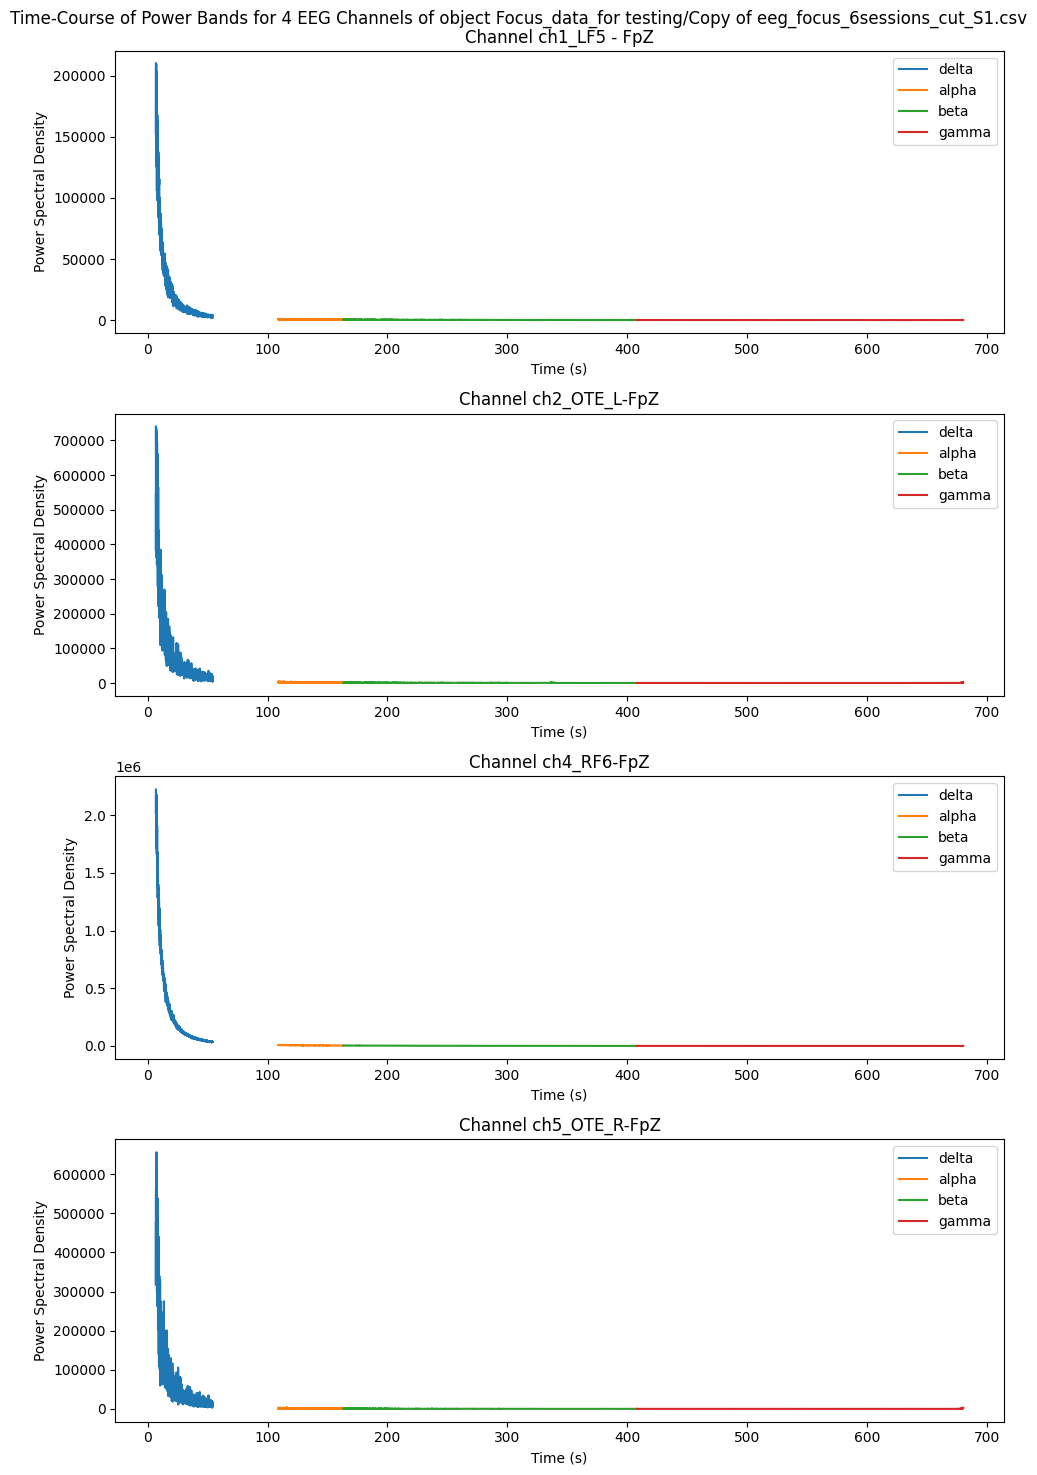

In [5]:
plot_time_course_all_bands("Focus_data_for testing/Copy of eeg_focus_6sessions_cut_S1.csv")

Creating RawArray with float64 data, n_channels=4, n_times=73289
    Range : 0 ... 73288 =      0.000 ...   586.304 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows


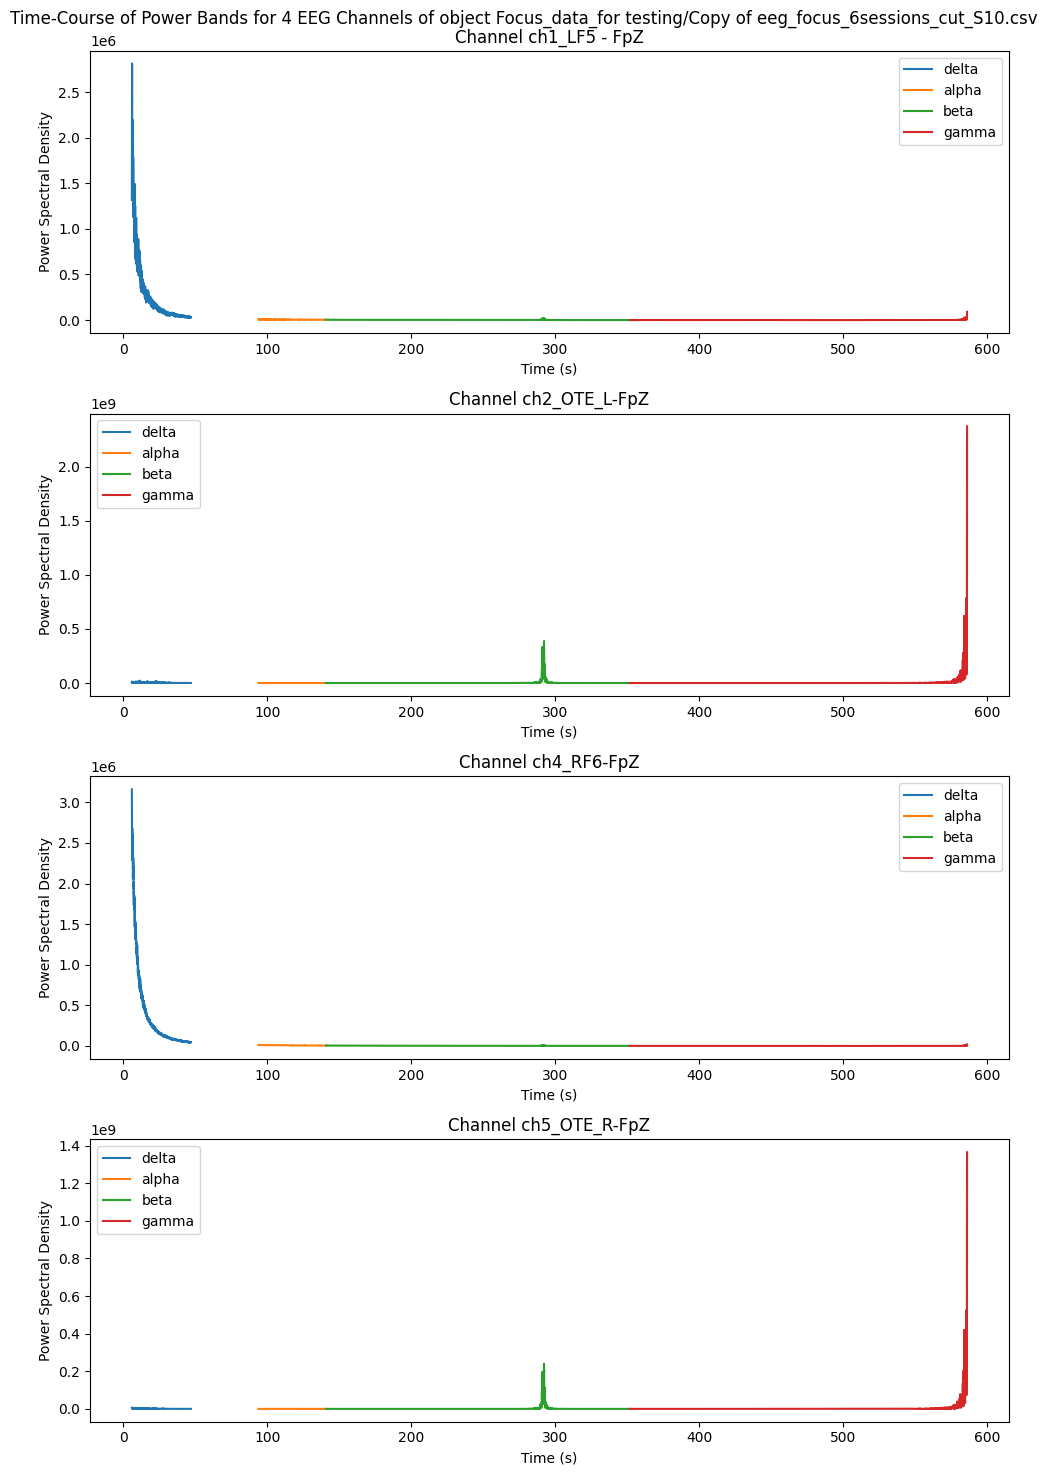

In [6]:
plot_time_course_all_bands("Focus_data_for testing/Copy of eeg_focus_6sessions_cut_S10.csv")

Creating RawArray with float64 data, n_channels=4, n_times=83746
    Range : 0 ... 83745 =      0.000 ...   669.960 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows


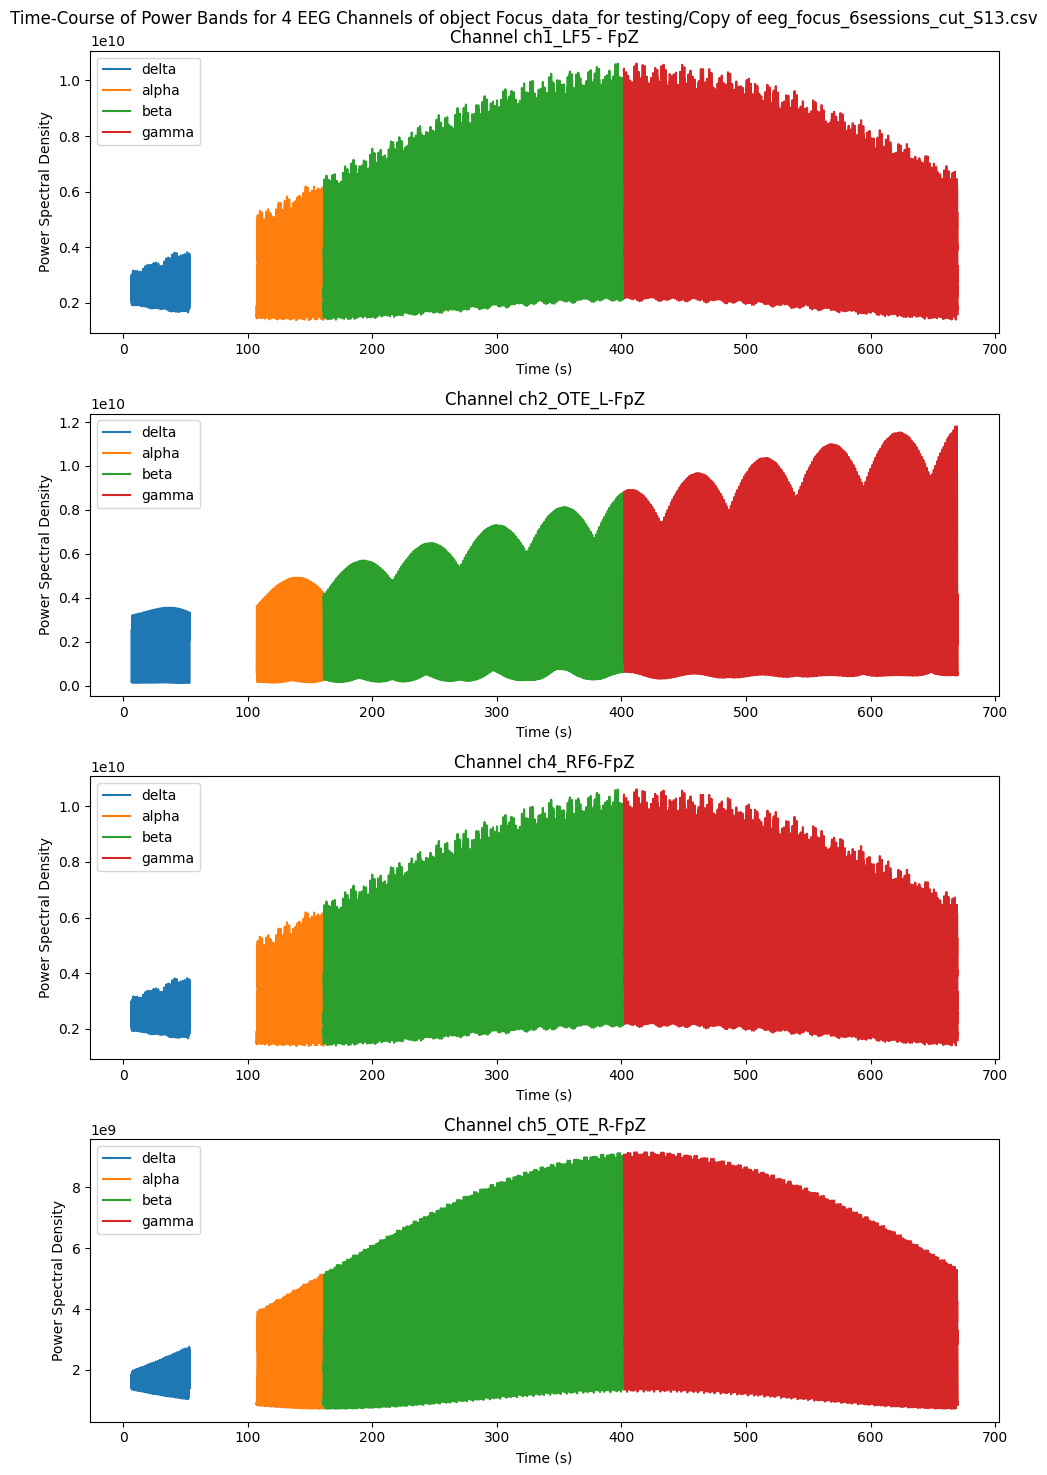

In [7]:
plot_time_course_all_bands("Focus_data_for testing/Copy of eeg_focus_6sessions_cut_S13.csv")

Creating RawArray with float64 data, n_channels=4, n_times=84850
    Range : 0 ... 84849 =      0.000 ...   678.792 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows


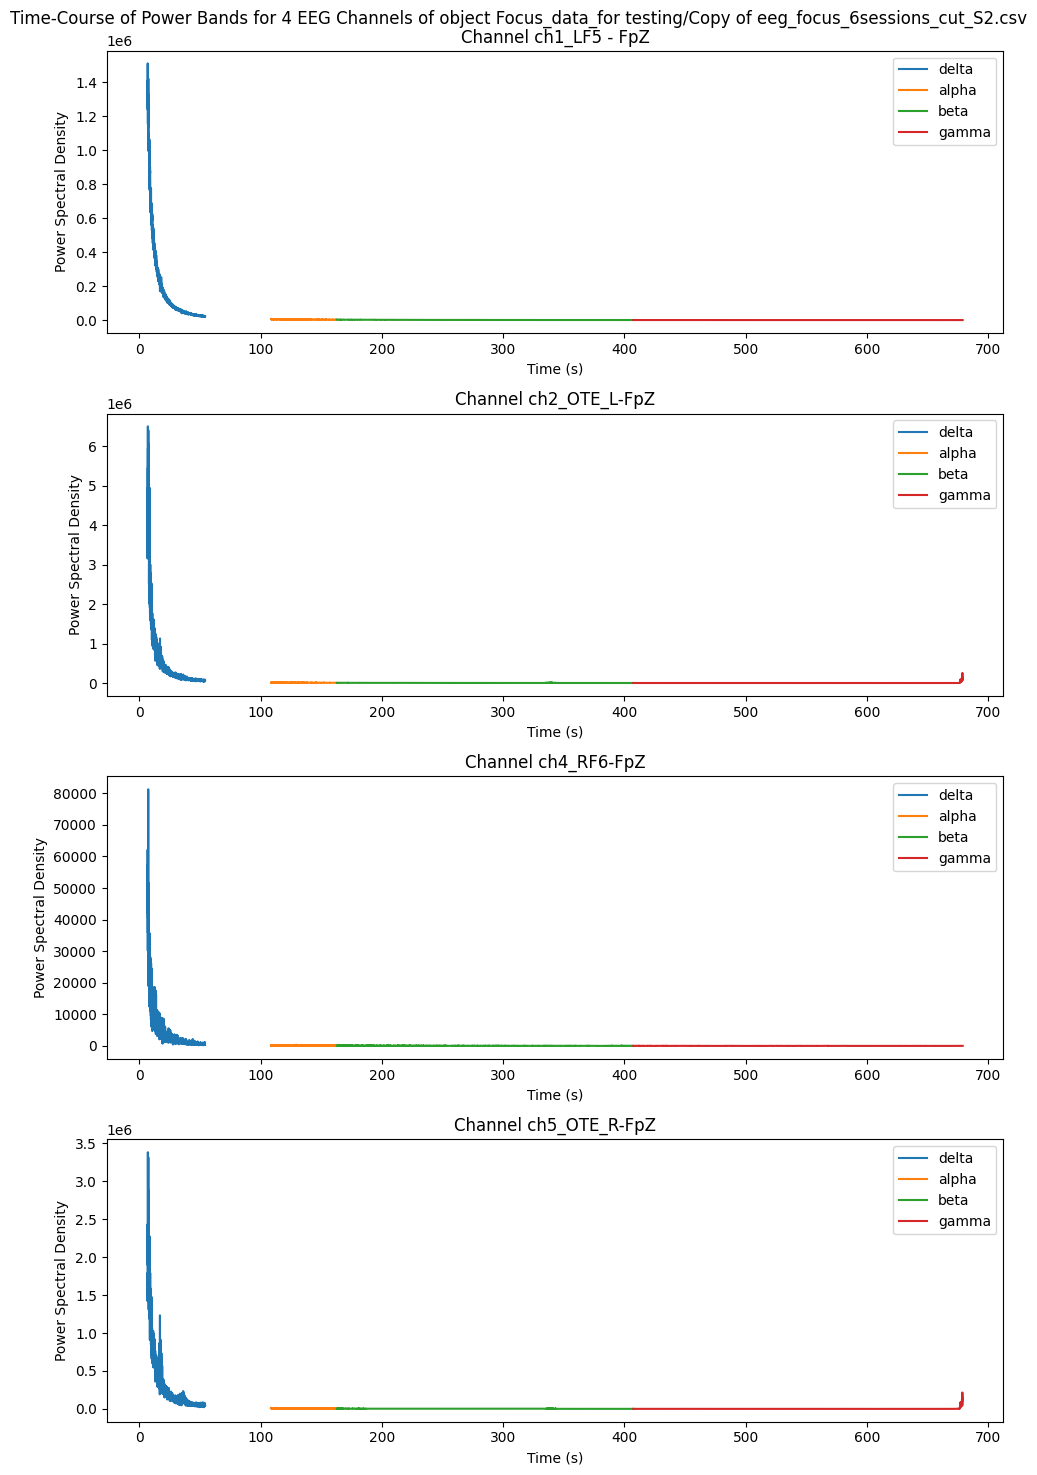

In [8]:
plot_time_course_all_bands("Focus_data_for testing/Copy of eeg_focus_6sessions_cut_S2.csv")

Creating RawArray with float64 data, n_channels=4, n_times=77889
    Range : 0 ... 77888 =      0.000 ...   623.104 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows


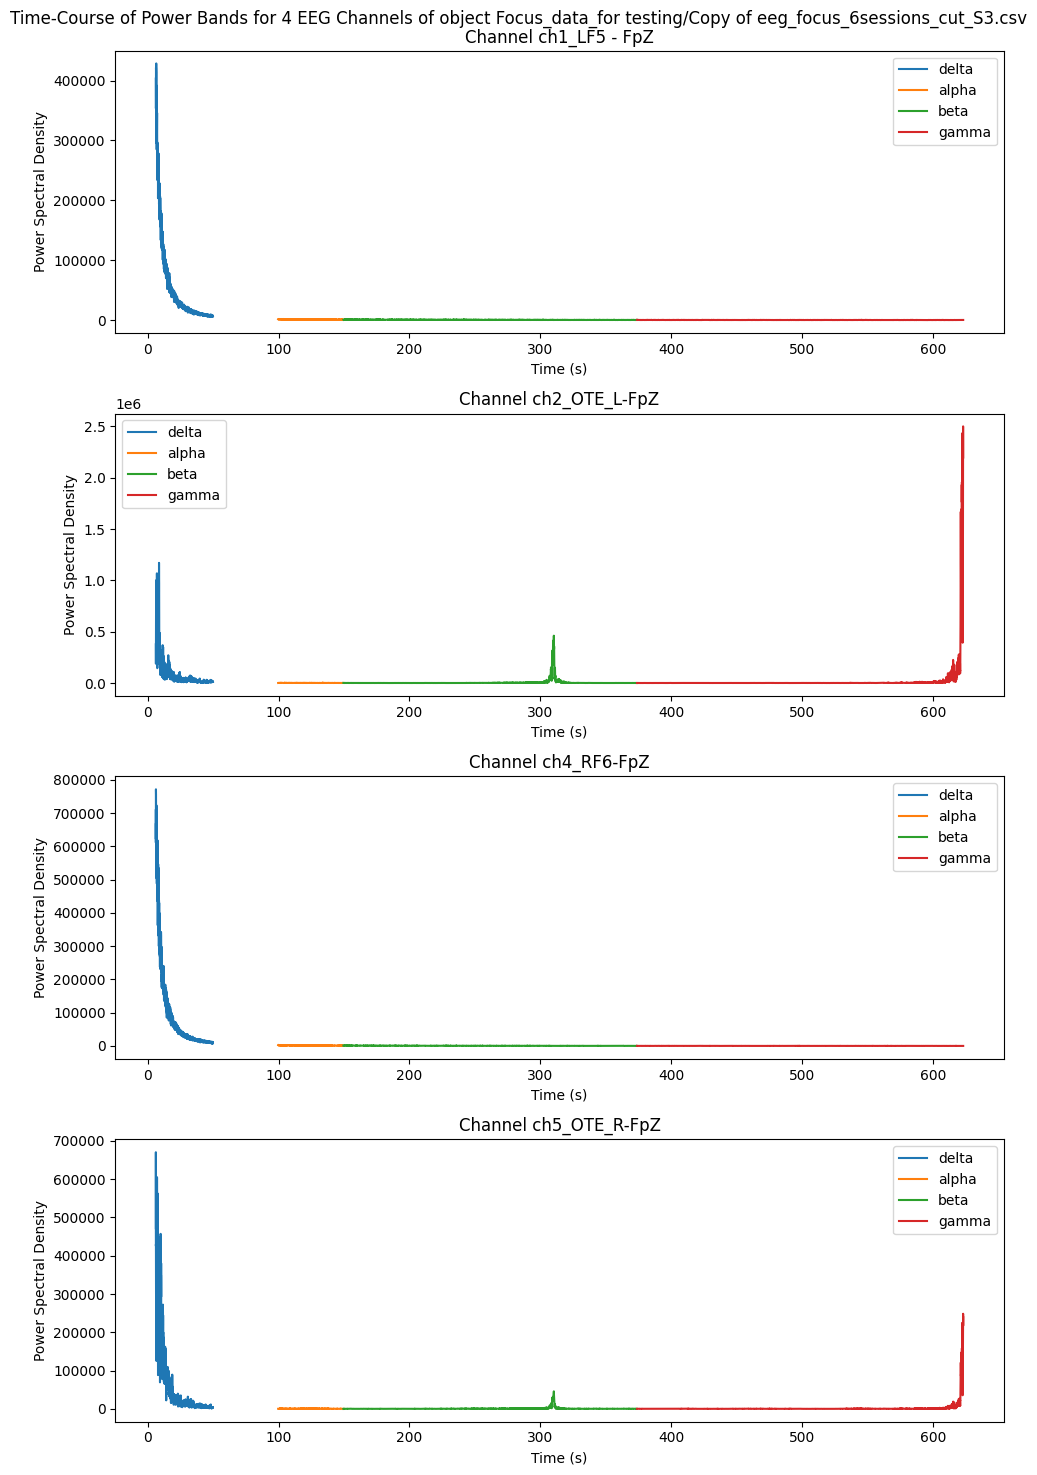

In [9]:
plot_time_course_all_bands("Focus_data_for testing/Copy of eeg_focus_6sessions_cut_S3.csv")

Creating RawArray with float64 data, n_channels=4, n_times=78829
    Range : 0 ... 78828 =      0.000 ...   630.624 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows


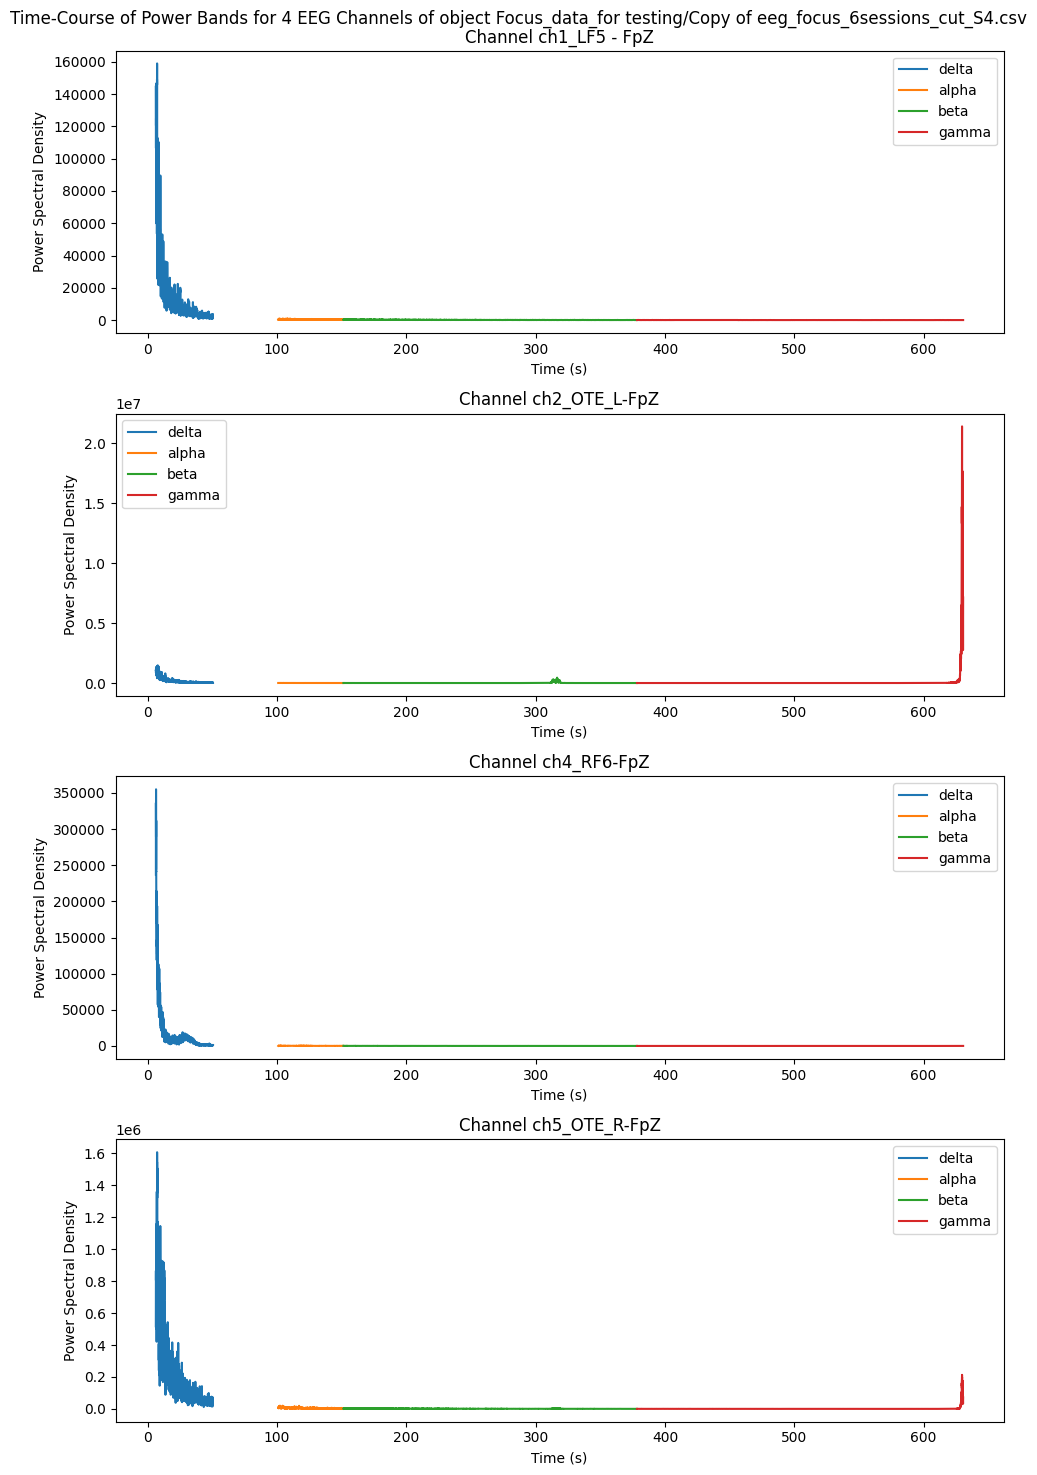

In [10]:
plot_time_course_all_bands("Focus_data_for testing/Copy of eeg_focus_6sessions_cut_S4.csv")

Creating RawArray with float64 data, n_channels=4, n_times=84800
    Range : 0 ... 84799 =      0.000 ...   678.392 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows


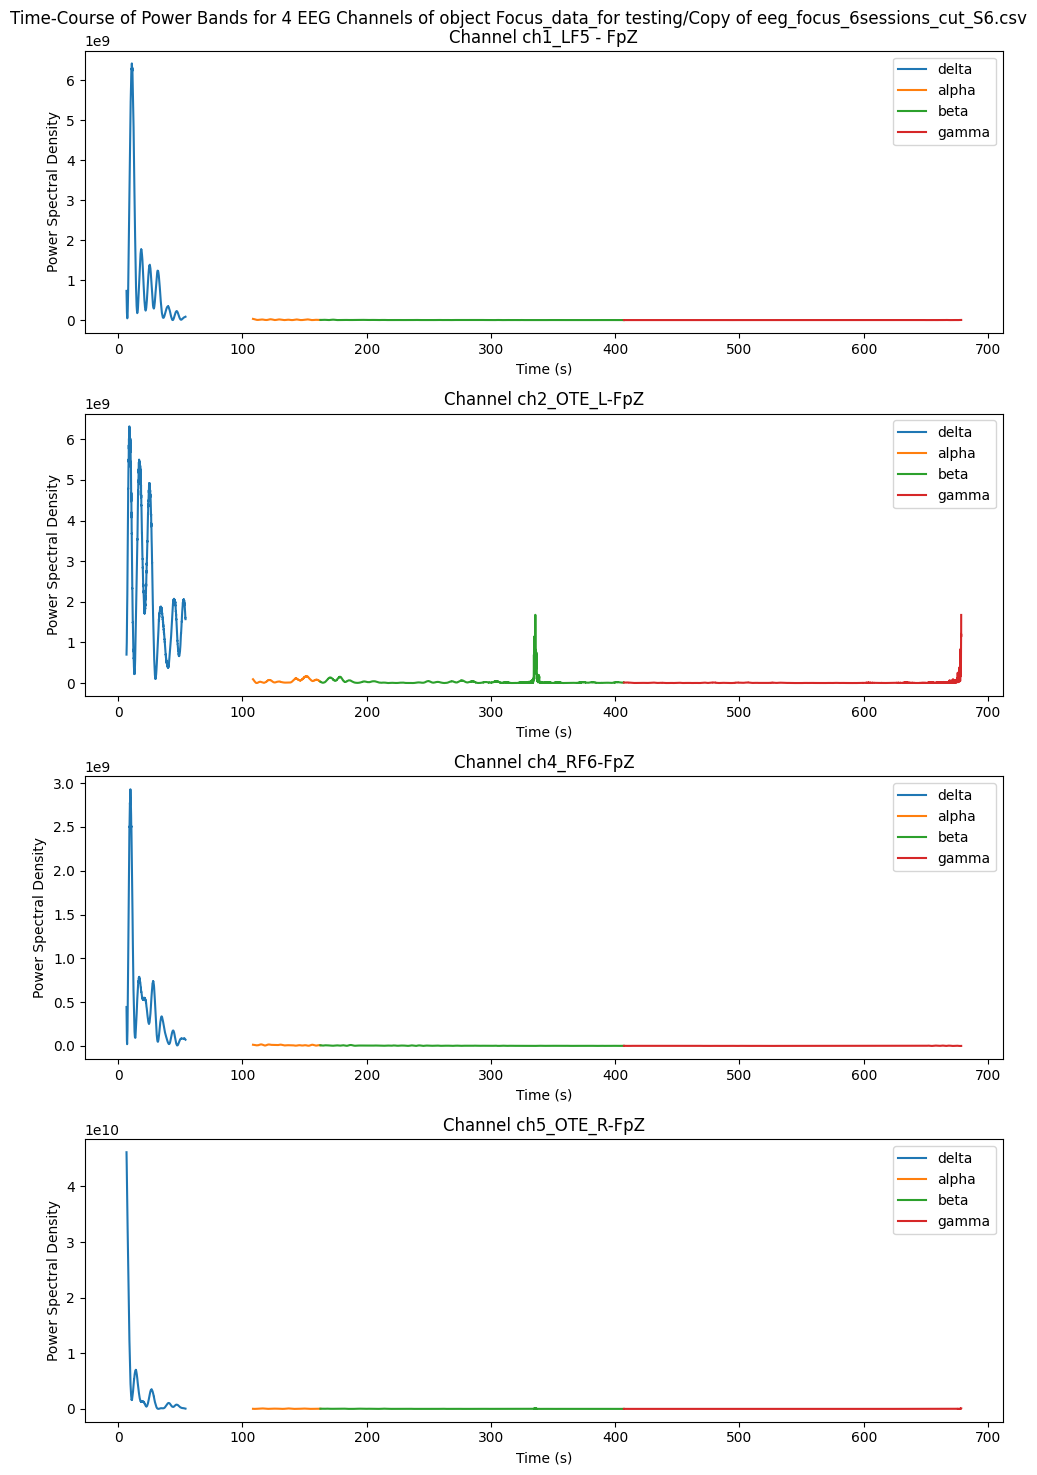

In [11]:
plot_time_course_all_bands("Focus_data_for testing/Copy of eeg_focus_6sessions_cut_S6.csv")

Creating RawArray with float64 data, n_channels=4, n_times=83192
    Range : 0 ... 83191 =      0.000 ...   665.528 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows


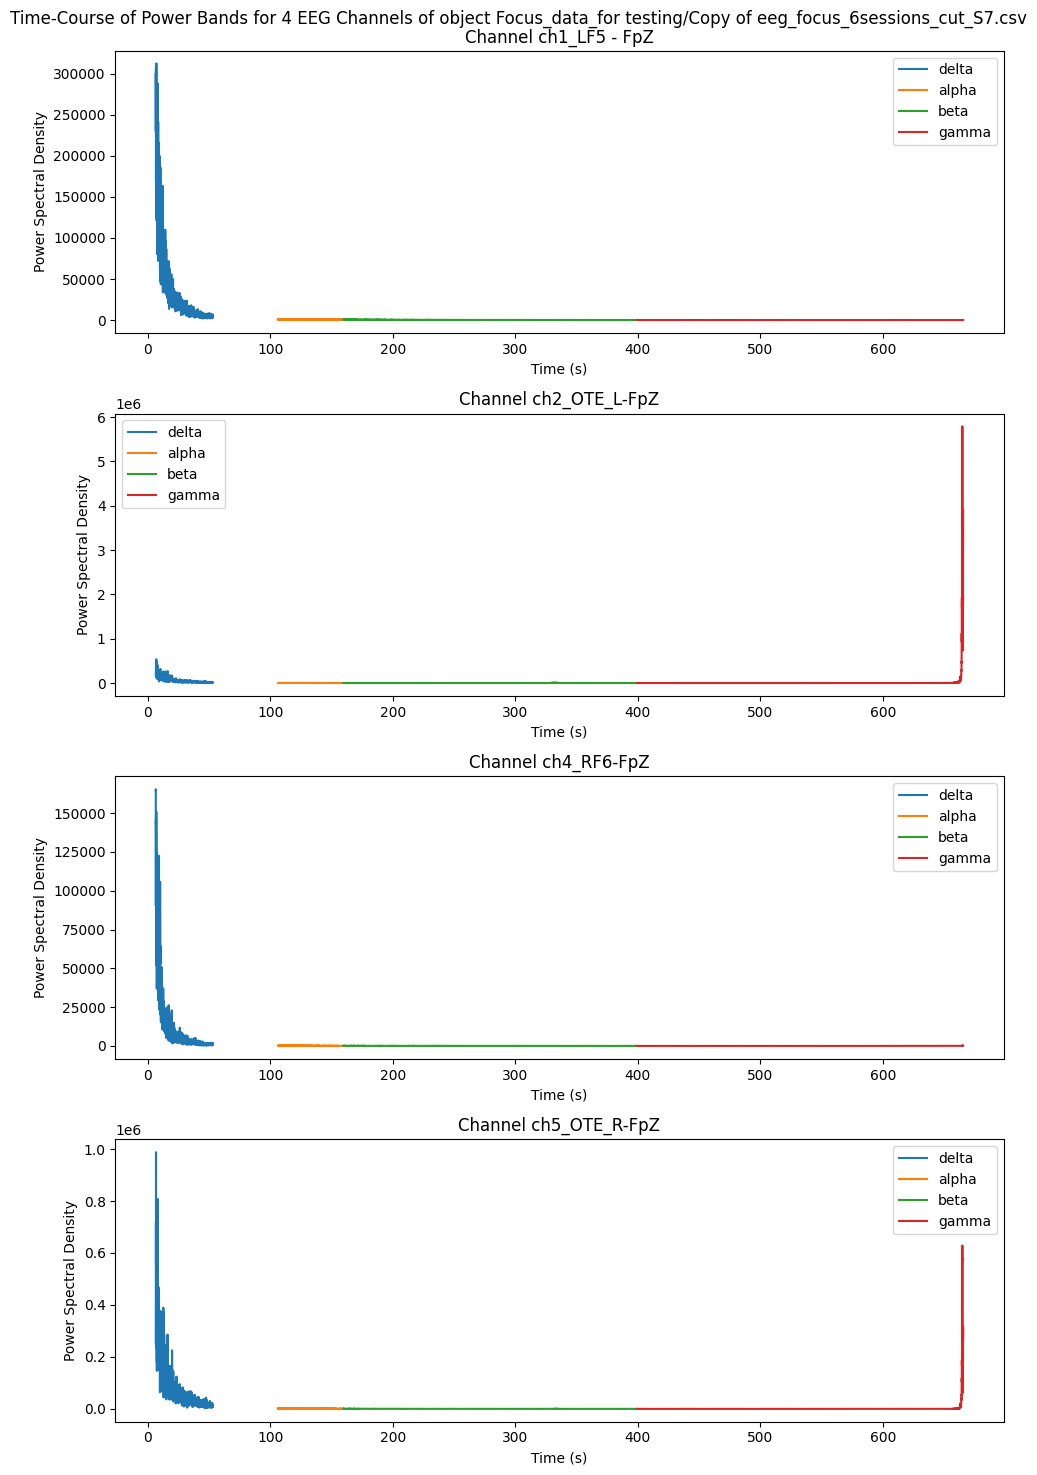

In [12]:
plot_time_course_all_bands("Focus_data_for testing/Copy of eeg_focus_6sessions_cut_S7.csv")

Creating RawArray with float64 data, n_channels=4, n_times=78638
    Range : 0 ... 78637 =      0.000 ...   629.096 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows


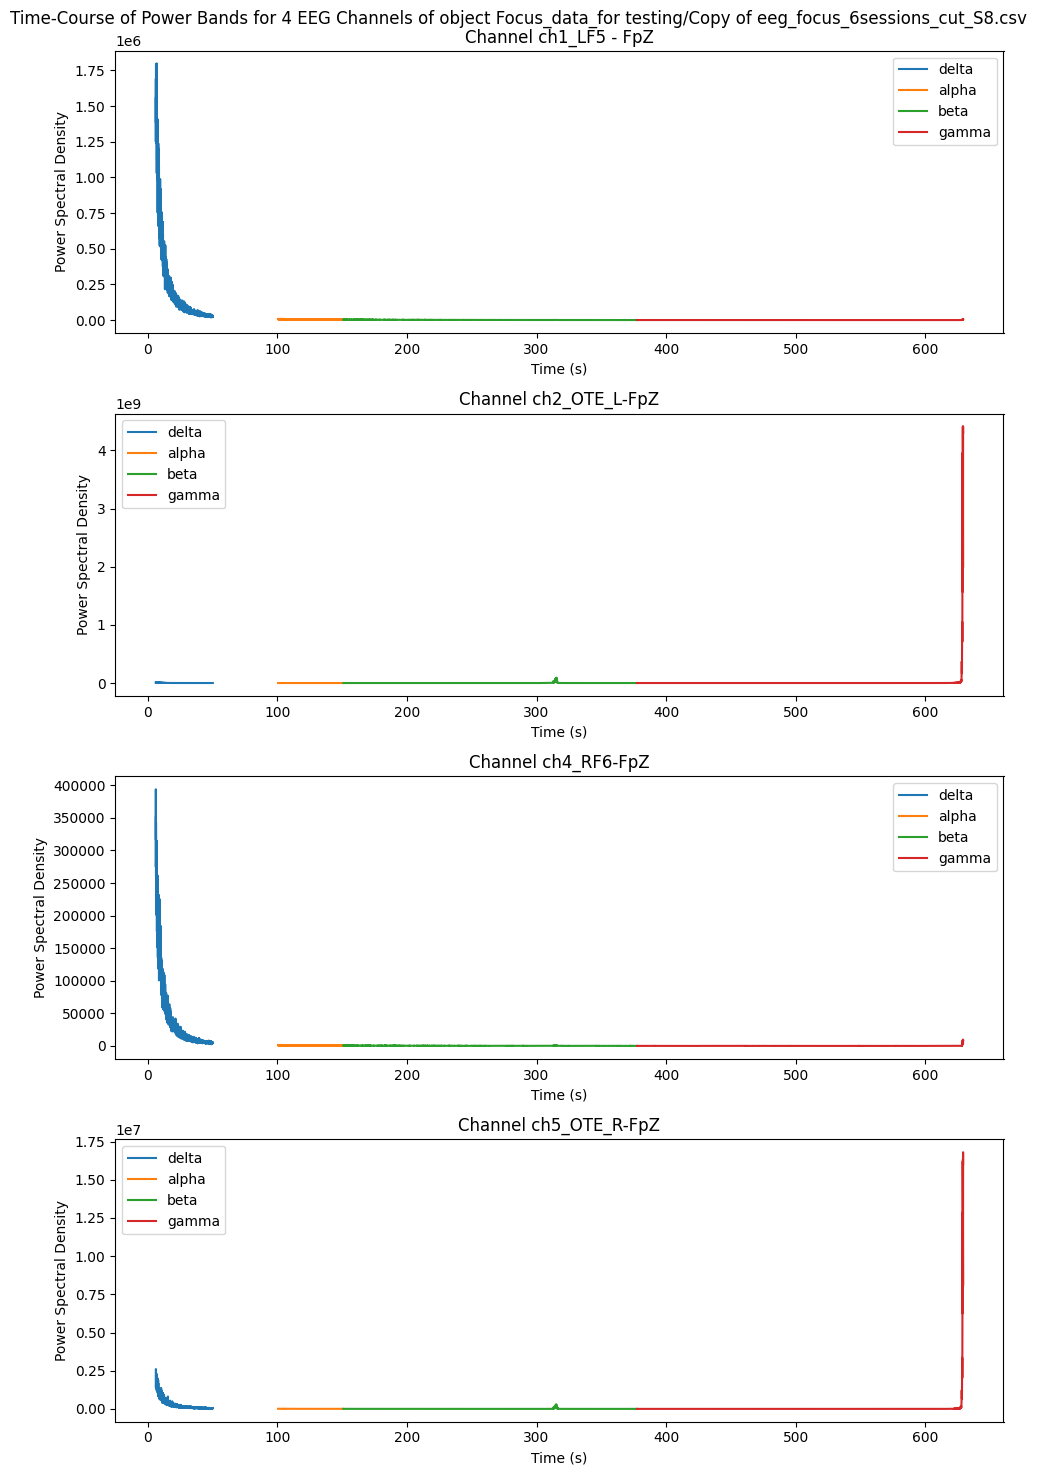

In [13]:
plot_time_course_all_bands("Focus_data_for testing/Copy of eeg_focus_6sessions_cut_S8.csv")

Creating RawArray with float64 data, n_channels=4, n_times=83758
    Range : 0 ... 83757 =      0.000 ...   670.056 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows


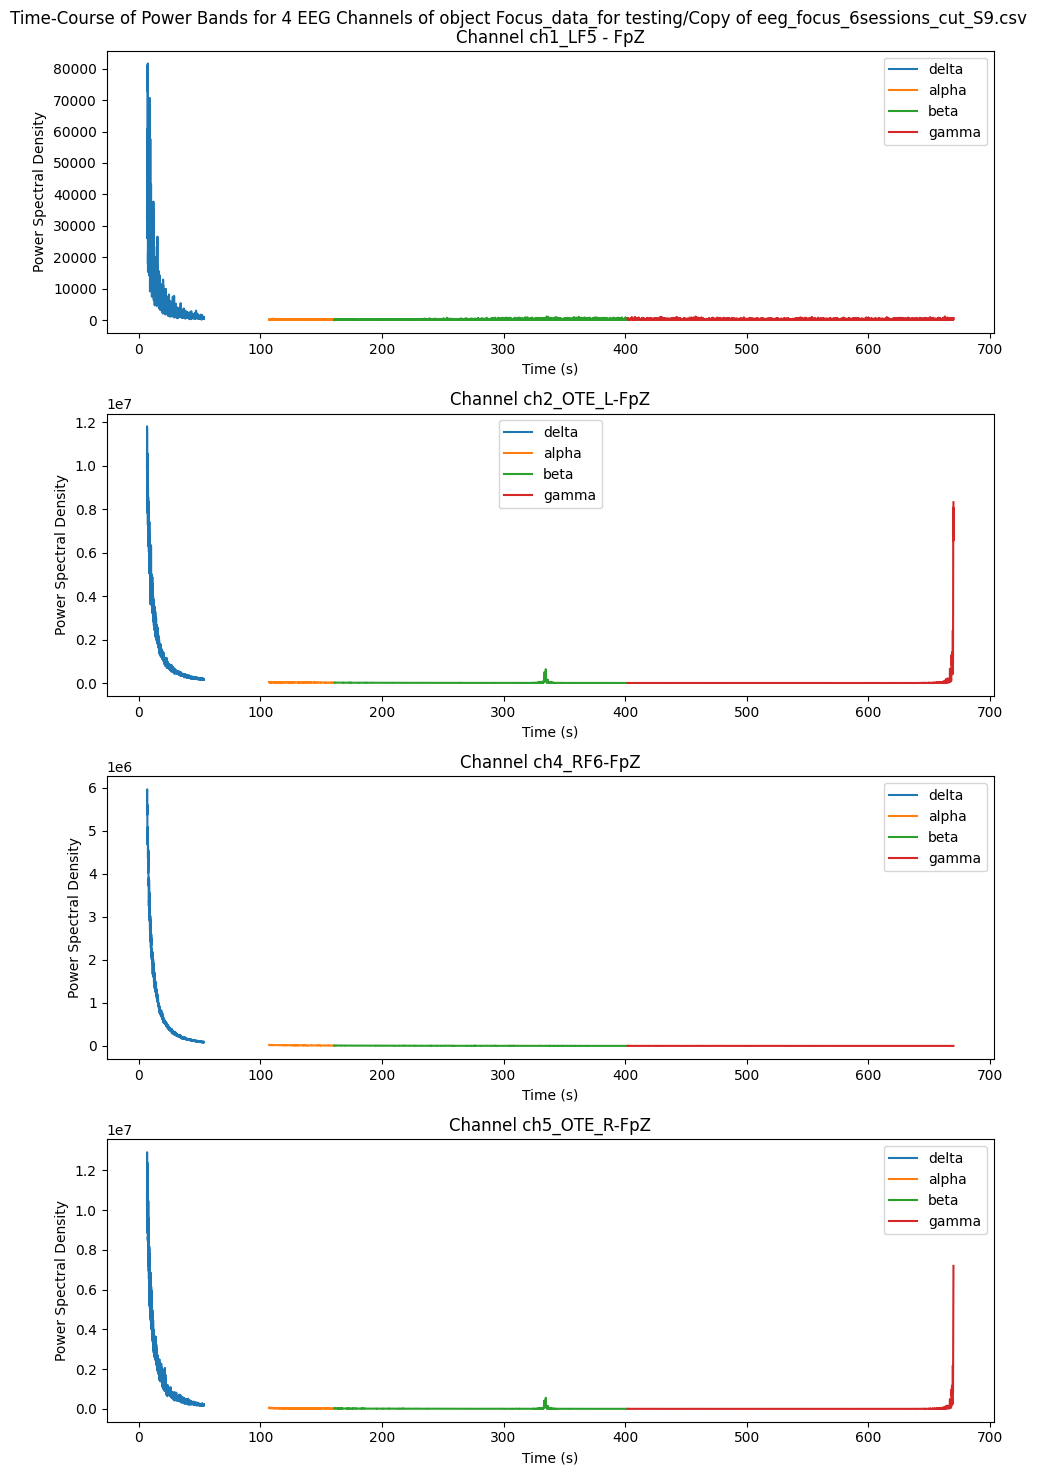

In [14]:
plot_time_course_all_bands("Focus_data_for testing/Copy of eeg_focus_6sessions_cut_S9.csv")

### Part 2: Plotted the time-course of all power bands averaging across subjects (10 subjects).

In [15]:
from glob import glob
psds = []
freqs = []
max_n_samples = 73289

DATA_FOLDER = "Focus_data_for testing"
files = glob(DATA_FOLDER + "/*.csv")
files

['Focus_data_for testing/Copy of eeg_focus_6sessions_cut_S13.csv',
 'Focus_data_for testing/Copy of eeg_focus_6sessions_cut_S10.csv',
 'Focus_data_for testing/Copy of eeg_focus_6sessions_cut_S6.csv',
 'Focus_data_for testing/Copy of eeg_focus_6sessions_cut_S7.csv',
 'Focus_data_for testing/Copy of eeg_focus_6sessions_cut_S4.csv',
 'Focus_data_for testing/Copy of eeg_focus_6sessions_cut_S1.csv',
 'Focus_data_for testing/Copy of eeg_focus_6sessions_cut_S3.csv',
 'Focus_data_for testing/Copy of eeg_focus_6sessions_cut_S2.csv',
 'Focus_data_for testing/Copy of eeg_focus_6sessions_cut_S9.csv',
 'Focus_data_for testing/Copy of eeg_focus_6sessions_cut_S8.csv']

In [16]:
# Calculate psd of all subjects
for file in files:
    raw_array = load_data(file, max_n_samples=max_n_samples)
    psd, freq = calculate_psd(raw_array)
    psds.append(psd)
    freqs.append(freq)

Creating RawArray with float64 data, n_channels=4, n_times=73289
    Range : 0 ... 73288 =      0.000 ...   586.304 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows
Creating RawArray with float64 data, n_channels=4, n_times=73289
    Range : 0 ... 73288 =      0.000 ...   586.304 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows
Creating RawArray with float64 data, n_channels=4, n_times=73289
    Range : 0 ... 73288 =      0.000 ...   586.304 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows
Creating RawArray with float64 data, n_channels=4, n_times=73289
    Range : 0 ... 73288 =      0.000 ...   586.304 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows
Creating RawArray with float64 data, n_channels=4, n_times=73289
    Range : 0 ... 73288 =      0.000 ...   586.304 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows
Creating RawArray with float64 data, n_channels=4, n_ti

In [17]:
# Average the PSDs across all subjects for each band
band_psd = {}
# Frequency bins
freq_bins = psds[0].shape[1]
# Calculate the times for each frequency bin
times = max_n_samples/sfreq/freq_bins * np.arange(freq_bins)

for band, (fmin, fmax) in zip(freqs_names, freq_ranges):
    freqs_idx = [np.where((freqs[i] >= fmin) & (freqs[i] < fmax))[0] for i in range(len(freqs))]
    band_psd[band] = np.mean([subj_psds[:, freqs_idx[idx]] for idx, subj_psds in enumerate(psds)], axis=0)

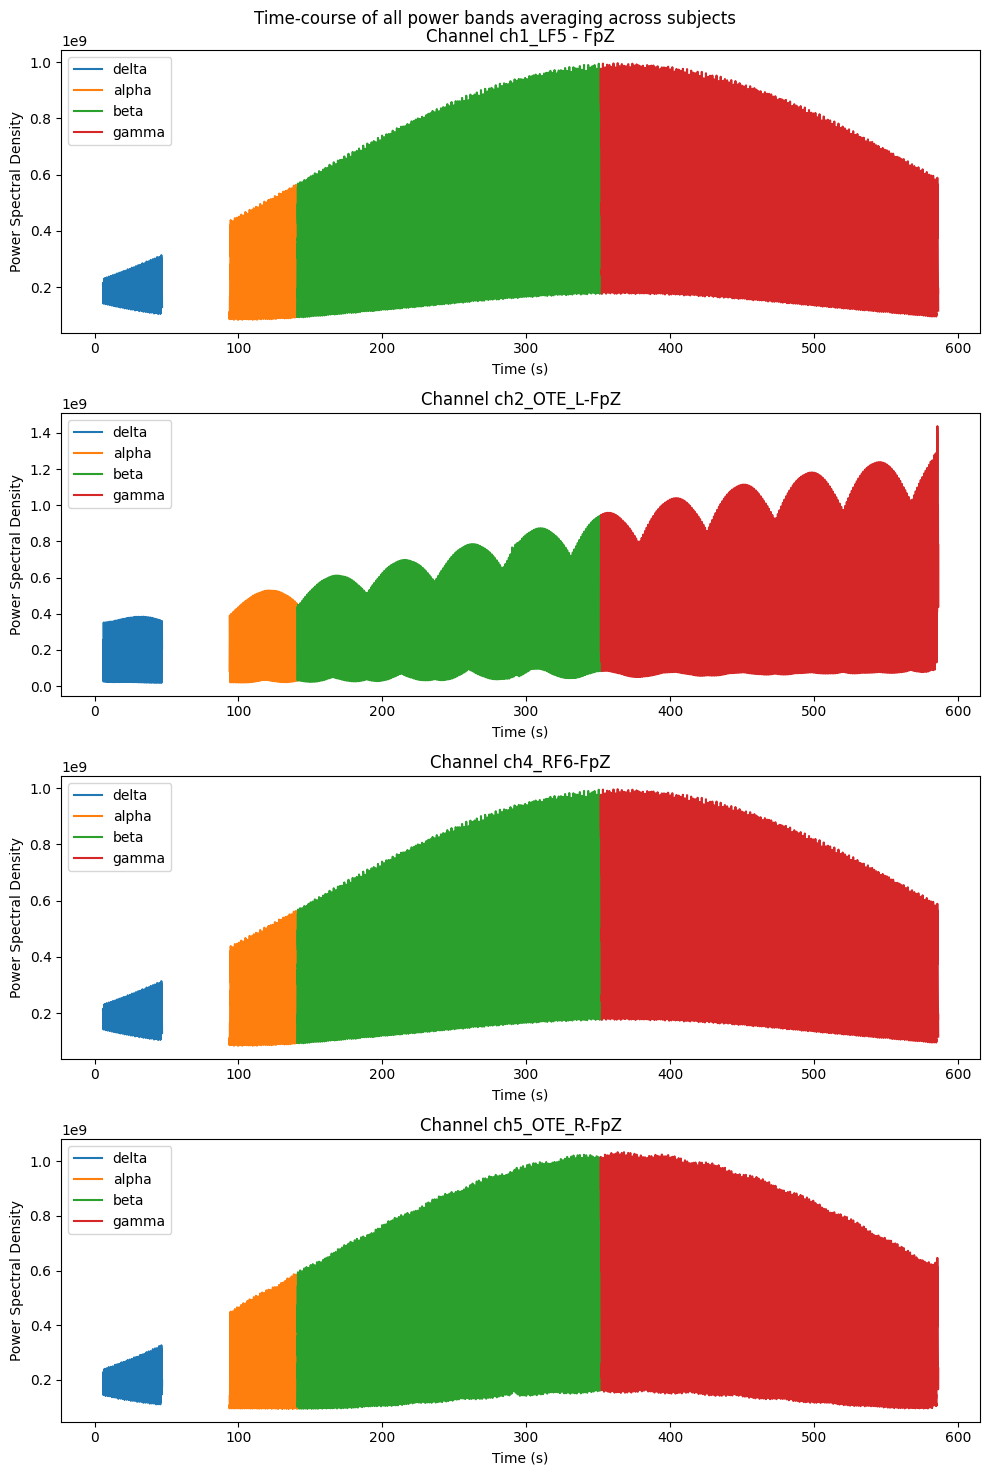

In [18]:
fig, ax = plt.subplots(nrows=4, ncols=1,figsize=(10, 15))
for i in range(len(ch_names)):
    for j in range(len(freqs_names)):
        fmin, fmax = freq_ranges[j]
        # Calculate freq for each band
        freq_idx = np.where((freqs[0] >= fmin) & (freqs[0] < fmax))[0]
        # Correct band time
        band_time = times[freq_idx]
        ax[i].plot(band_time, band_psd[freqs_names[j]][i], label=freqs_names[j])
    ax[i].legend()
    ax[i].set_xlabel('Time (s)')
    ax[i].set_ylabel('Power Spectral Density')
    ax[i].set_title('Channel {}'.format(ch_names[i]))
fig.suptitle("Time-course of all power bands averaging across subjects")
plt.tight_layout()
plt.show()